In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import bokeh
from sklearn import preprocessing
from sklearn import discriminant_analysis
from sklearn import model_selection
import bokeh.plotting

In [2]:
bokeh.plotting.output_notebook()

Loading BokehJS ...

In [7]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select
from bokeh.io import push_notebook
from ipywidgets import interact
tools = ['pan','box_zoom','reset', 'hover']
p = bokeh.plotting.figure(tools=tools)
tools = ['pan','box_zoom','reset', 'hover']
bk_source = bokeh.plotting.ColumnDataSource(df_wine)
#bk_view = bokeh.plotting.CDSView(source = bk_source)
#p.vbar(x= 'fixed acidity', y= 'volatile acidity', source=df_wine)
x = 'fixed acidity'
y = 'volatile acidity'
sct = p.scatter(df_wine[x], df_wine[y], hover_color='red')
t = bokeh.plotting.show(p, notebook_handle=True)

@interact(x=list(df_wine.columns), y=list(df_wine.columns))
def redraw(x , y):
    sct.data_source.data = {'x' : df_wine[x], 'y' :df_wine[y]}
    push_notebook(handle=t)

interactive(children=(Dropdown(description='x', options=('fixed acidity', 'volatile acidity', 'citric acid', '…

In [8]:
tools = ['pan','box_zoom','reset', 'hover']
plot_2 = bokeh.plotting.figure(tools=tools)
#bk_view = bokeh.plotting.CDSView(source = bk_source)
#p.vbar(x= 'fixed acidity', y= 'volatile acidity', source=df_wine)
bar_x ='fixed acidity'
is_asc =True
num_of_view = 100
vbar = plot_2.vbar(x=range(num_of_view),top=df_wine.sort_values(by=bar_x, ascending=is_asc)[x].head(num_of_view), width=1)
hdl_bar = bokeh.plotting.show(plot_2, notebook_handle=True)

@interact(bar_x=list(df_wine.columns), num_of_view=(1, len(df_wine)), asc=['asc', 'desc'])
#@interact(bar_x=list(df_wine.columns))
def redraw_2(bar_x, num_of_view, asc):
    is_asc = True if asc=='asc' else False
    vbar.data_source.data = {'x': range(num_of_view), 'top': df_wine.sort_values(by=bar_x, ascending=is_asc)[bar_x].head(num_of_view)}
    push_notebook(handle=hdl_bar)

interactive(children=(Dropdown(description='bar_x', options=('fixed acidity', 'volatile acidity', 'citric acid…

In [10]:
plot_3= bokeh.plotting.figure(tools=tools)
#bk_view = bokeh.plotting.CDSView(source = bk_source)
#p.vbar(x= 'fixed acidity', y= 'volatile acidity', source=df_wine)
items = ['fixed acidity', 'volatile acidity', 'citric acid']
num_of_view = 50
vbar_cum = []
vbar_cum.append(plot_3.vbar(x=range(num_of_view),top=df_wine[items[0]].head(num_of_view), width=1,fill_alpha= 0/len(items), legend=items[0]))
for i in range(len(items)-1):
    vbar_cum.append(plot_3.vbar(x=range(num_of_view),top=df_wine[items[i+1]].head(num_of_view), bottom=df_wine[items[i]].head(num_of_view), width=1, fill_alpha= (i+1)/len(items), legend=items[i+1]))
hdl_bar_cum = bokeh.plotting.show(plot_3, notebook_handle=True)

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',\
    delimiter=';')

In [4]:
df_dodger = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/Dodgers.data',\
    delimiter=',', header=0, names=['times', 'point'])

In [34]:
tools = ['pan','box_zoom','reset', 'hover']
plot_4= bokeh.plotting.figure(tools=tools, x_axis_type='datetime')
num_of_view = 1000
linep = plot_4.line(x=df_dodger.iloc[0:num_of_view].times, y=df_dodger.iloc[0:num_of_view].point)
handle_line = bokeh.plotting.show(plot_4, notebook_handle=True)

slider_span = (0,len(df_dodger))
@interact(start=slider_span, scale=['hour','day','week','month'])
def redraw_4(start, scale):
    dict_timemap = {'hour': 12,'day': 12 * 24 ,'week' : 12 * 24 * 7,'month' : 12 * 24 * 7 * 30}
    df_span = df_dodger.iloc[start:start + dict_timemap[scale]]
    linep.data_source.data = {'x': df_span.times, 'y': df_span.point}
    push_notebook(handle=handle_line)

interactive(children=(IntSlider(value=25199, description='start', max=50399), Dropdown(description='scale', op…

# Preprocessing

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_wine.iloc[:,:-1],df_wine.iloc[:,-1],test_size=0.3)

# Model choice

In [9]:
df_wine.corr().sort_values(by='quality',) ['quality']

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

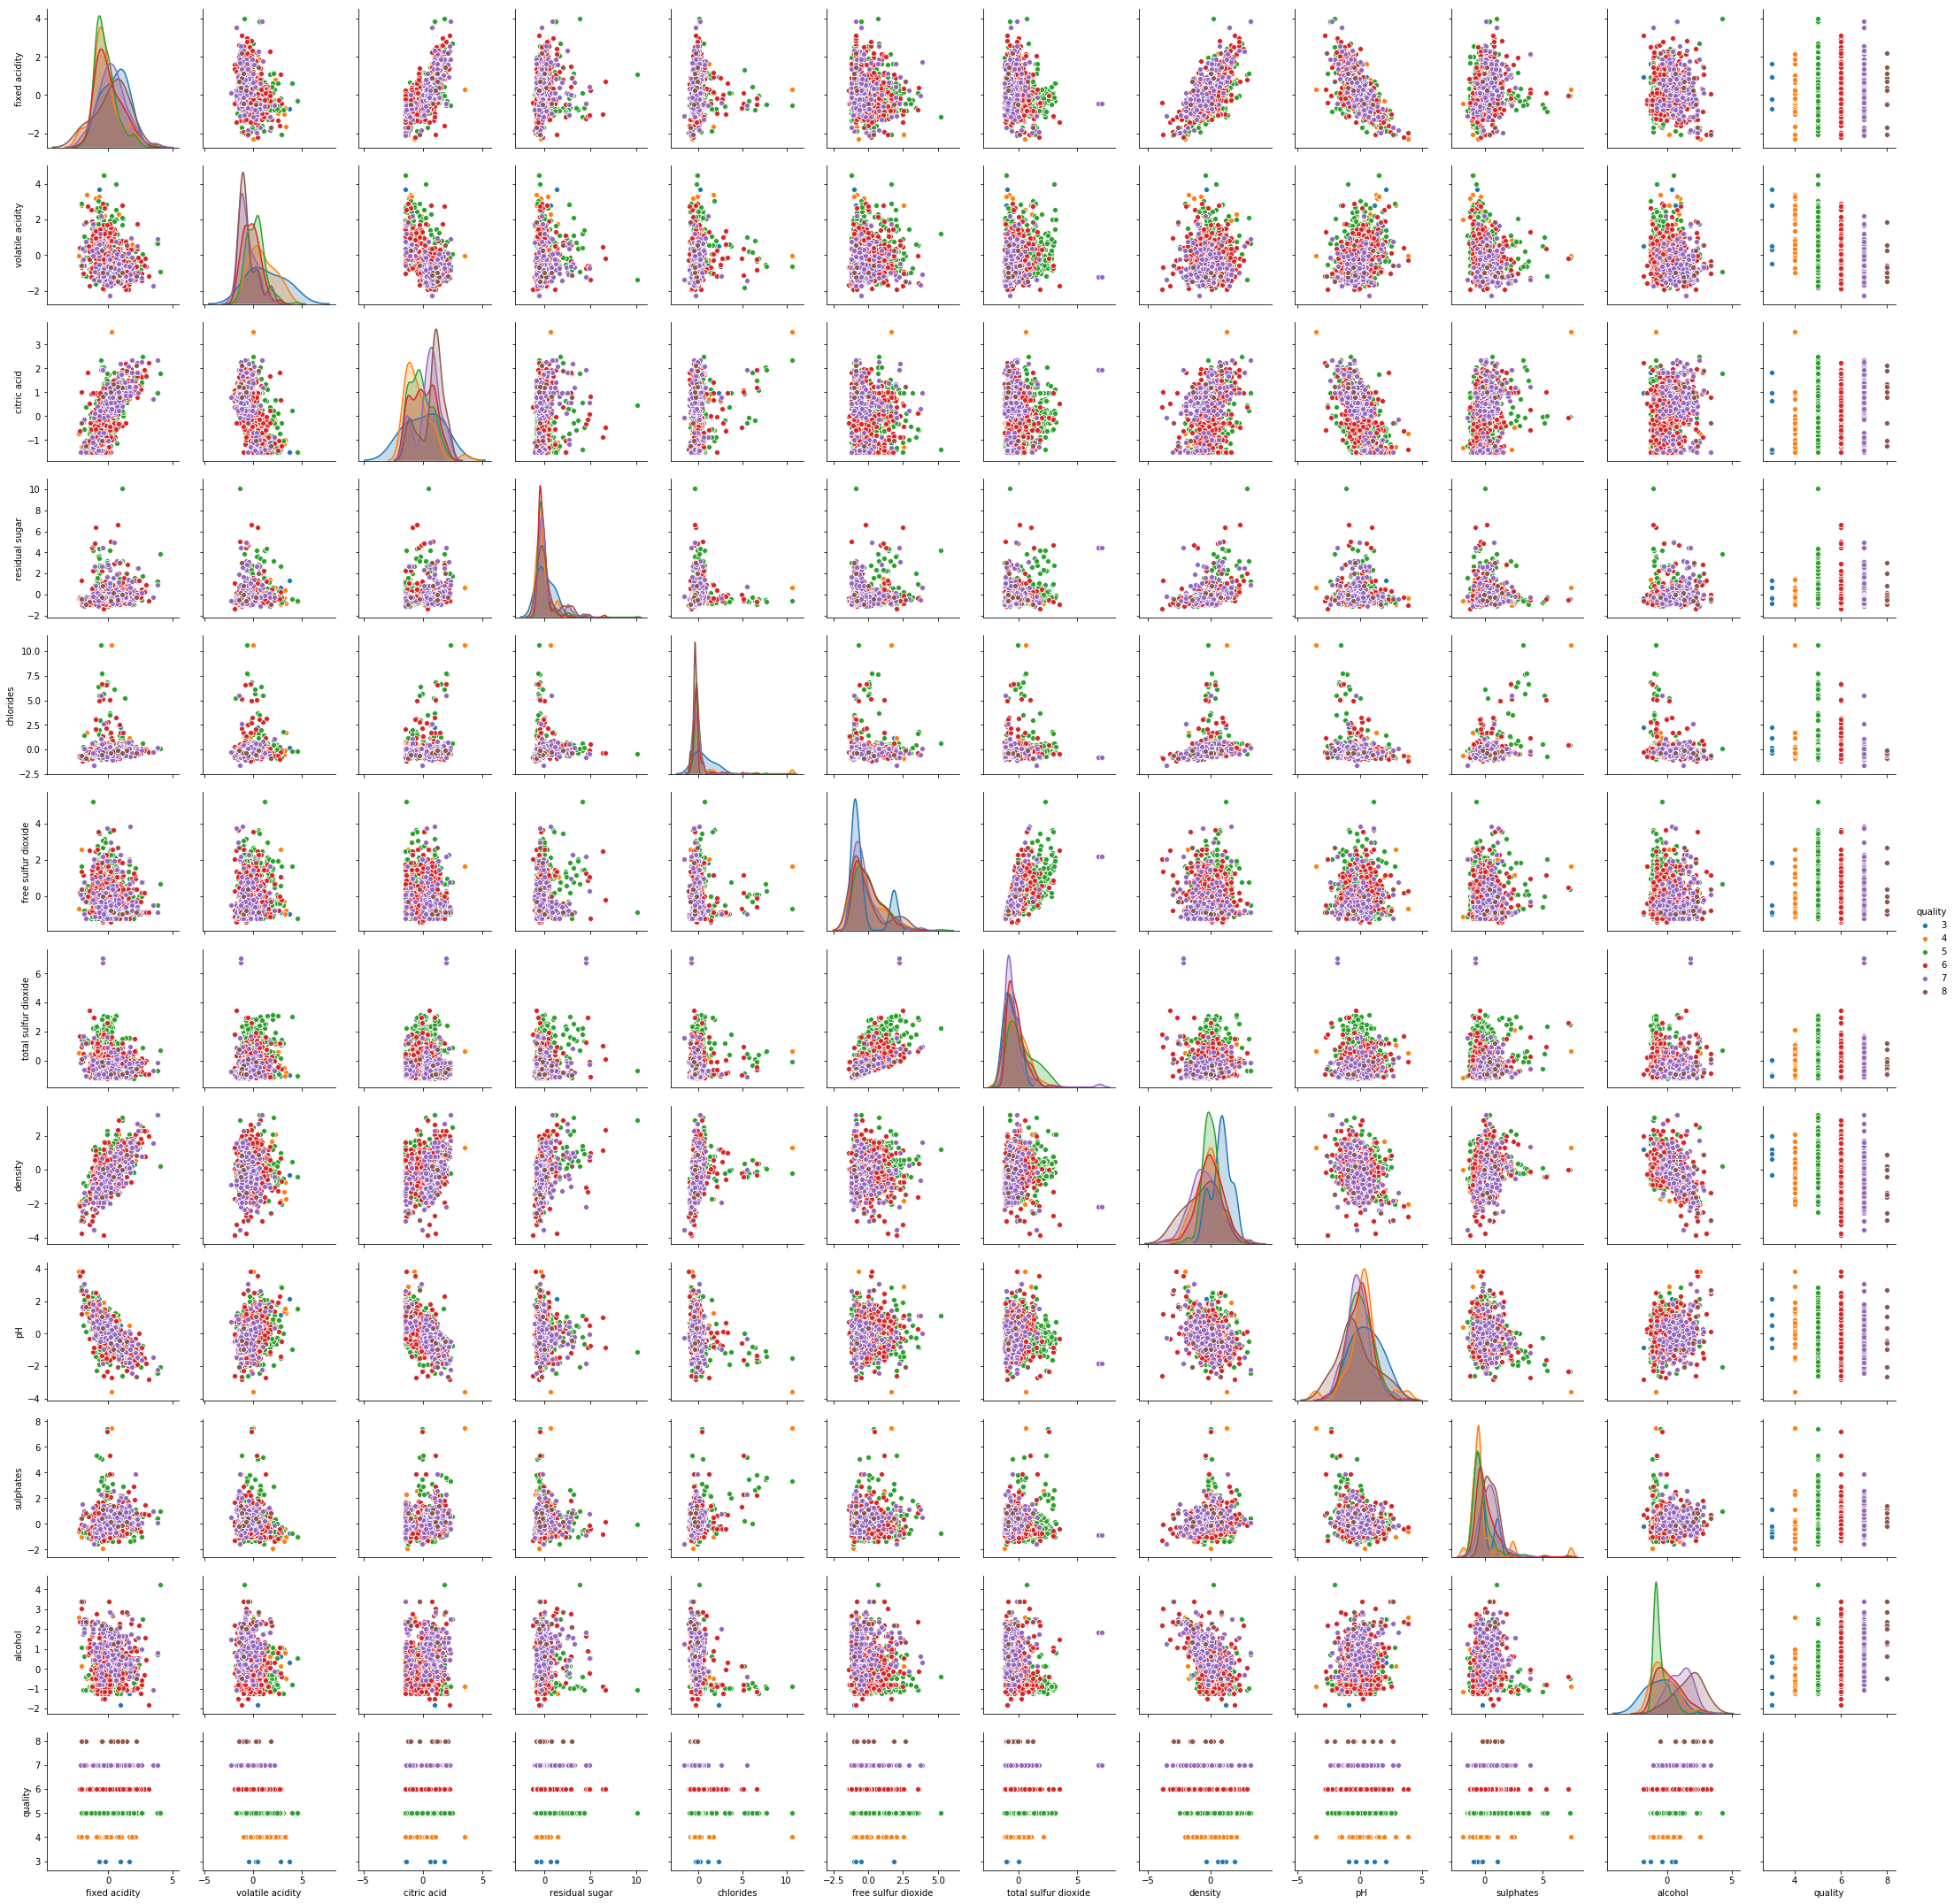

In [66]:
sns.pairplot(df_train,hue='quality')

# Estimation

In [10]:
model_factor = ['alcohol','sulphates', 'citric acid', 'volatile acidity']

In [11]:
#model_factor = ['alcohol','sulphates']
model_factor = ['alcohol','sulphates', 'citric acid', 'volatile acidity']
#model_factor =['alcohol', 'volatile acidity', 'citric acid']
#model_factor = x_train.keys()

In [12]:
classifer_lda = discriminant_analysis.LinearDiscriminantAnalysis(store_covariance=True)
classifer_lda.fit(x_train[model_factor],y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [13]:
est_result = pd.DataFrame({'predicted': classifer_lda.predict(x_test[model_factor]),'result': y_test})

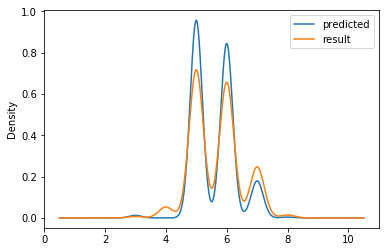

In [14]:
est_result.plot(kind='kde')

In [84]:
classifer_lda.score(x_test[model_factor], y_test)

0.5895833333333333

# RF iteration

In [107]:
result = {}
candidates = list(x_train.keys())
candidates.remove('alcohol')
for i in candidates:
    model_factor = ['alcohol', i]
    classifer_lda = discriminant_analysis.LinearDiscriminantAnalysis(store_covariance=True)
    classifer_lda.fit(x_train[model_factor],y_train)
    result[i] = classifer_lda.score(x_test[model_factor], y_test)

In [108]:
result

{'fixed acidity': 0.5770833333333333,
 'volatile acidity': 0.56875,
 'citric acid': 0.575,
 'residual sugar': 0.5625,
 'chlorides': 0.5604166666666667,
 'free sulfur dioxide': 0.5458333333333333,
 'total sulfur dioxide': 0.5625,
 'density': 0.5625,
 'pH': 0.5708333333333333,
 'sulphates': 0.5875}

sulphates accepted

In [104]:
result = {}
candidates = list(x_train.keys())
candidates.remove('alcohol')
candidates.remove('sulphates')
for i in candidates:
    model_factor = ['alcohol', 'sulphates', i]
    classifer_lda = discriminant_analysis.LinearDiscriminantAnalysis(store_covariance=True)
    classifer_lda.fit(x_train[model_factor],y_train)
    result[i] = classifer_lda.score(x_test[model_factor], y_test)

In [105]:
result

{'fixed acidity': 0.5875,
 'volatile acidity': 0.5958333333333333,
 'citric acid': 0.5875,
 'residual sugar': 0.5875,
 'chlorides': 0.5708333333333333,
 'free sulfur dioxide': 0.575,
 'total sulfur dioxide': 0.575,
 'density': 0.5854166666666667,
 'pH': 0.5916666666666667}

volatile acidity accepted

In [109]:
result = {}
candidates = list(x_train.keys())
candidates.remove('alcohol')
candidates.remove('sulphates')
candidates.remove('volatile acidity')
for i in candidates:
    model_factor = ['alcohol', 'sulphates', 'volatile acidity', i]
    classifer_lda = discriminant_analysis.LinearDiscriminantAnalysis(store_covariance=True)
    classifer_lda.fit(x_train[model_factor],y_train)
    result[i] = classifer_lda.score(x_test[model_factor], y_test)

In [111]:
result

{'fixed acidity': 0.5958333333333333,
 'citric acid': 0.5895833333333333,
 'residual sugar': 0.5916666666666667,
 'chlorides': 0.5895833333333333,
 'free sulfur dioxide': 0.5958333333333333,
 'total sulfur dioxide': 0.6020833333333333,
 'density': 0.5895833333333333,
 'pH': 0.5916666666666667}